In [1]:
#import csv data 
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#importing the shapefiles using geopandas
afstand = gpd.read_file('assignment/afstand_tot_rijksmonumenten.shp')
print(afstand.shape)
print(afstand.head())

(50, 15)
   FID_2buffe  FID_Buffer  Id     Afstand  FID_Buff_1  OBJECTID  Shape_Leng  \
0           0           0   0   200 meter          -1         0         0.0   
1           2           5   0   200 meter          -1         0         0.0   
2          -1           0   0  1000 meter           0         0         0.0   
3          -1           0   0  1000 meter           0         0         0.0   
4          -1           0   0  1000 meter           0         0         0.0   

   Shape_Area Afstand_1  FID_Buff_2  OBJECTID_1    Shape_Le_1    Shape_Ar_1  \
0         0.0      None          -1           0  0.000000e+00  0.000000e+00   
1         0.0      None          -1           0  0.000000e+00  0.000000e+00   
2         0.0      None           0           1  1.128482e+07  9.022495e+09   
3         0.0      None           0           1  1.128482e+07  9.022495e+09   
4         0.0      None           0           1  1.128482e+07  9.022495e+09   

   Afstand_12                            

<AxesSubplot:>

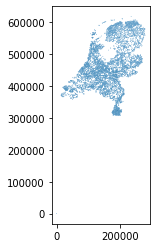

In [3]:
#plot the whole of netherlands 
afstand.plot()

In [4]:
#export province data 
provinces= gpd.read_file('assignment/NLD_adm1.shp')
print(provinces.shape)
print(provinces.head())

(14, 10)
   ID_0  ISO       NAME_0  ID_1      NAME_1     TYPE_1 ENGTYPE_1 NL_NAME_1  \
0   158  NLD  Netherlands     1     Drenthe  Provincie  Province      None   
1   158  NLD  Netherlands     2   Flevoland  Provincie  Province      None   
2   158  NLD  Netherlands     3   Friesland  Provincie  Province      None   
3   158  NLD  Netherlands     4  Gelderland  Provincie  Province      None   
4   158  NLD  Netherlands     5   Groningen  Provincie  Province      None   

                           VARNAME_1  \
0                               None   
1                               None   
2                Frise|Frisia|Frísia   
3  Geldern|Gheldria|Guelders|Gueldre   
4                 Groninga|Groningue   

                                            geometry  
0  POLYGON ((6.50131 53.19841, 6.50429 53.19749, ...  
1  MULTIPOLYGON (((5.44521 52.55581, 5.43211 52.5...  
2  MULTIPOLYGON (((5.24917 53.25458, 5.24917 53.2...  
3  POLYGON ((5.92733 52.48264, 5.93285 52.47410, ...  
4  MUL

<AxesSubplot:>

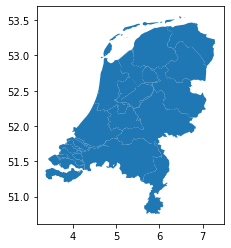

In [5]:
#plotting the Netherlands with all provinces
provinces.plot()

In [6]:
#create a subset of the Province of Gronigen 
from shapely.geometry import Polygon
groningen = provinces[provinces['NAME_1']=='Groningen']

<AxesSubplot:>

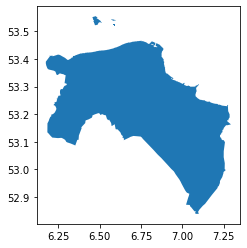

In [7]:
#plot the province of Groningen
groningen.plot()

In [8]:
#crs of the area
groningen.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
afstand.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [10]:
#change coordinate system of afstand
dist= afstand.set_crs('epsg: 4326', allow_override=True)

In [11]:
#extract the dist in groningen province from the center of Groningen
dist_groningen=groningen.overlay(dist, how= 'intersection')

In [12]:
dist_groningen.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,FID_2buffe,...,OBJECTID,Shape_Leng,Shape_Area,Afstand_1,FID_Buff_2,OBJECTID_1,Shape_Le_1,Shape_Ar_1,Afstand_12,geometry
0,158,NLD,Netherlands,5,Groningen,Provincie,Province,None,Groninga|Groningue,12,...,1,7.950390e+06,2.880572e+09,500 meter,0,1,1.128482e+07,9.022495e+09,1000 meter,"MULTIPOLYGON (((6.75250 53.46542, 6.75361 53.4..."


<AxesSubplot:>

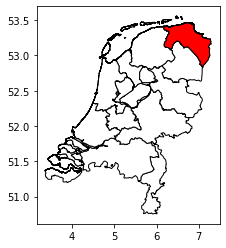

In [13]:
#plot the province of Groningen in the Netherlands map
fig, ax = plt.subplots()
ax.set_aspect('equal')
provinces.plot(ax=ax, color='white', edgecolor='black')
dist_groningen.plot(ax=ax, color='red', edgecolor='black')

In [14]:
#load the Address data
ad_data= gpd.read_file('assignment/address_data.shp')

In [15]:
ad_data

,huisnummer,huisletter,huisnumm_1,postcode,Latitude,Longitude,houseaddre,geometry
0,7,h,14,8919AK,53.230427,5.747119,8919AK-7-h14,POINT (5.74712 53.23043)
1,9,a,None,5431DT,51.728849,5.880756,5431DT-9-a,POINT (5.88076 51.72885)
2,149,None,None,7523ES,52.237621,6.900415,7523ES-149-,POINT (6.90041 52.23762)
3,23,None,None,9406PL,53.001650,6.537760,9406PL-23-,POINT (6.53776 53.00165)
4,10,S,None,2262EA,52.091436,4.386640,2262EA-10-S,POINT (4.38664 52.09144)
...,...,...,...,...,...,...,...,...
2995,8,None,None,8064JC,52.639908,6.059676,8064JC-8-,POINT (6.05968 52.63991)
2996,148,None,None,3069RE,51.962554,4.541916,3069RE-148-,POINT (4.54192 51.96255)
2997,5,A,None,1566NC,52.456891,4.688944,1566NC-5-A,POINT (4.68894 52.45689)
2998,5,None,None,3144BM,51.928022,4.245843,3144BM-5-,POINT (4.24584 51.92802)


In [16]:
#extract the house address in groningen province
ad_groningen=groningen.overlay(ad_data, how= 'intersection',keep_geom_type=False)

<AxesSubplot:>

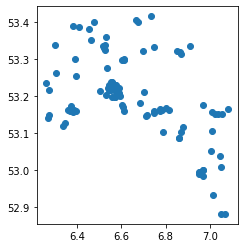

In [17]:
ad_groningen.plot()

In [18]:
#calculate the centroids of the polygon
dist_groningen['centroid'] = dist_groningen.centroid
print(dist_groningen.head(2))

   ID_0  ISO       NAME_0  ID_1     NAME_1     TYPE_1 ENGTYPE_1 NL_NAME_1  \
0   158  NLD  Netherlands     5  Groningen  Provincie  Province      None   

            VARNAME_1  FID_2buffe  ...    Shape_Leng    Shape_Area  Afstand_1  \
0  Groninga|Groningue          12  ...  7.950390e+06  2.880572e+09  500 meter   

   FID_Buff_2  OBJECTID_1    Shape_Le_1    Shape_Ar_1  Afstand_12  \
0           0           1  1.128482e+07  9.022495e+09  1000 meter   

                                            geometry                  centroid  
0  MULTIPOLYGON (((6.75250 53.46542, 6.75361 53.4...  POINT (6.76846 53.21064)  

[1 rows x 25 columns]


/tmp/ipykernel_137/3616623456.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist_groningen['centroid'] = dist_groningen.centroid


In [19]:
#create a function that extracts the distance from centroid in Groningen 
def calculate_distance(row, dist_geom, src_col='geometry', target_col='dist_to_monument'):

    # Calculate the distances
    dist = row[src_col].distance(dist_geom)

    # Assign the distance to the original data
    row[target_col] = dist*1000
    return row

In [21]:
# Retrieve the geometry from address GeoDataFrame
ad_groningen_geom = ad_groningen.loc[0, 'geometry']
print(ad_groningen_geom)

POINT (6.86739489736691 53.1014669707954)


In [22]:
# Calculate the distances using our custom function called 'calculate_distance'
dist_groningen =dist_groningen.apply(calculate_distance, dist_geom=ad_groningen_geom, src_col='centroid', target_col='dist_to_monument', axis=1)
print(dist_groningen.head(10))

   ID_0  ISO       NAME_0  ID_1     NAME_1     TYPE_1 ENGTYPE_1 NL_NAME_1  \
0   158  NLD  Netherlands     5  Groningen  Provincie  Province      None   

            VARNAME_1  FID_2buffe  ...    Shape_Area  Afstand_1 FID_Buff_2  \
0  Groninga|Groningue          12  ...  2.880572e+09  500 meter          0   

   OBJECTID_1    Shape_Le_1    Shape_Ar_1  Afstand_12  \
0           1  1.128482e+07  9.022495e+09  1000 meter   

                                            geometry  \
0  MULTIPOLYGON (((6.75250 53.46542, 6.75361 53.4...   

                                      centroid  dist_to_monument  
0  POINT (6.768463975356239 53.21063635686181)        147.327126  

[1 rows x 26 columns]


In [24]:
# Calculat the maximum and average distance
max_dist = dist_groningen['dist_to_monument'].max()
min_dist = dist_groningen['dist_to_monument'].min()
mean_dist =dist_groningen['dist_to_monument'].mean()

print("Maximum distance to monument is %.0f m,and the mean distance is %.05f m." % (max_dist, mean_dist))

Maximum distance to monument is 147 m,and the mean distance is 147.32713 m.
